# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Getting a base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Creating empty lists to add data in
city_name = []
lng = []
lat = []
maxtemp = []
hum = []
cloud = []
windsp = []
country = []
dt = []

city_number = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()

    #Appending Responses in the lists created above
    try:
        city_number = city_number + 1
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windsp.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
    
    #Prining the log as API calls are processed, skipping cities that are missing from the API
    
        print(f'Processing Record of city number {city_number}  | {response["name"]}')
    
    except KeyError:
        print(f'City not found, Skipping..')

Processing Record of city number 1  | Campechuela
Processing Record of city number 2  | Jamestown
Processing Record of city number 3  | East London
Processing Record of city number 4  | Davila
City not found, Skipping..
Processing Record of city number 6  | Hermanus
Processing Record of city number 7  | Kargil
Processing Record of city number 8  | Mahébourg
Processing Record of city number 9  | Kamenka
Processing Record of city number 10  | Lufkin
Processing Record of city number 11  | Kahului
Processing Record of city number 12  | Lata
Processing Record of city number 13  | Busselton
Processing Record of city number 14  | Ushuaia
Processing Record of city number 15  | eMkhomazi
Processing Record of city number 16  | Hilo
Processing Record of city number 17  | Ondarroa
Processing Record of city number 18  | Malbork
Processing Record of city number 19  | Terrace
Processing Record of city number 20  | Ponta do Sol
Processing Record of city number 21  | Manokwari
Processing Record of city

Processing Record of city number 174  | Libenge
Processing Record of city number 175  | Tautira
Processing Record of city number 176  | Būlaevo
Processing Record of city number 177  | Beringovskiy
City not found, Skipping..
Processing Record of city number 179  | College
Processing Record of city number 180  | New Richmond
Processing Record of city number 181  | Hualmay
Processing Record of city number 182  | Dutse
Processing Record of city number 183  | Pangnirtung
Processing Record of city number 184  | Pont-Rouge
Processing Record of city number 185  | Sidhi
Processing Record of city number 186  | Lompoc
Processing Record of city number 187  | Severnyy
Processing Record of city number 188  | Bambous Virieux
City not found, Skipping..
Processing Record of city number 190  | Ballina
Processing Record of city number 191  | Dakar
Processing Record of city number 192  | Chui
Processing Record of city number 193  | Gamba
Processing Record of city number 194  | Fortuna
Processing Record of

Processing Record of city number 346  | Usinsk
Processing Record of city number 347  | Koson
Processing Record of city number 348  | Samarai
Processing Record of city number 349  | Beira
Processing Record of city number 350  | Hohhot
Processing Record of city number 351  | Ancud
Processing Record of city number 352  | Slave Lake
City not found, Skipping..
Processing Record of city number 354  | Saint Paul Harbor
Processing Record of city number 355  | Kloulklubed
Processing Record of city number 356  | Djibouti
Processing Record of city number 357  | Amalāpuram
Processing Record of city number 358  | Wanlaweyn
Processing Record of city number 359  | Vanimo
Processing Record of city number 360  | Calella
Processing Record of city number 361  | Berlevåg
Processing Record of city number 362  | Paka
Processing Record of city number 363  | Marzuq
Processing Record of city number 364  | Boden
Processing Record of city number 365  | Kalakamati
Processing Record of city number 366  | San Quint

Processing Record of city number 517  | Papetoai
Processing Record of city number 518  | Owerri
Processing Record of city number 519  | Assiut
Processing Record of city number 520  | Cashel
Processing Record of city number 521  | Liverpool
Processing Record of city number 522  | Camacha
Processing Record of city number 523  | San Cristobal
Processing Record of city number 524  | Mackay
Processing Record of city number 525  | Celestún
Processing Record of city number 526  | Urengoy
Processing Record of city number 527  | Kysyl-Syr
Processing Record of city number 528  | Dunedin
Processing Record of city number 529  | San Rafael
Processing Record of city number 530  | Phak Hai
Processing Record of city number 531  | Maskinongé
Processing Record of city number 532  | Waipawa
Processing Record of city number 533  | Oberá
Processing Record of city number 534  | Harper
City not found, Skipping..
City not found, Skipping..
Processing Record of city number 537  | Saint-Pierre
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Storing Data recieved from API calls in a dictionary
city_dict = {
    "City": city_name,
    "Lat": lat,
    'Lng': lng,
    'Max Temp': maxtemp,
    'Humidity':hum,
    'Cloudiness':cloud,
    'Wind Speed':windsp,
    'Country':country,
    'Date':dt
    
}

#Saving Raw Data into a Data Frame
city_data = pd.DataFrame(city_dict)
city_data.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Campechuela,20.2342,-77.2789,88.81,63,86,3.89,CU,1661032210
1,Jamestown,42.0970,-79.2353,83.79,47,100,6.91,US,1661032211
2,East London,-33.0153,27.9116,55.15,65,86,16.46,ZA,1661032211
3,Davila,18.4726,120.5763,75.18,78,81,2.48,PH,1661032211
4,Hermanus,-34.4187,19.2345,46.80,69,39,6.91,ZA,1661032212


In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.016865,14.802613,68.811463,71.745645,56.062718,8.085157,1.661032e+09
std,33.186489,90.593538,14.411109,20.405012,39.694508,5.060879,9.100812e+01
min,-54.800000,-175.200000,33.820000,12.000000,0.000000,0.000000,1.661032e+09
25%,-6.823725,-65.559950,58.405000,62.000000,10.250000,4.160000,1.661032e+09
50%,21.854250,18.389250,71.710000,77.000000,68.000000,6.910000,1.661032e+09
75%,48.141125,100.209875,79.605000,87.000000,98.000000,11.500000,1.661032e+09
max,78.218600,179.316700,106.140000,100.000000,100.000000,28.050000,1.661032e+09


In [7]:
#Saving Data frame created into CSV file:
city_data.to_csv(r'WeatherPy_Output\city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

# Since Max Hummidity in cities in the above table is 100 it means that there are no cities with humidity > 100% 
Hence step skipped.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

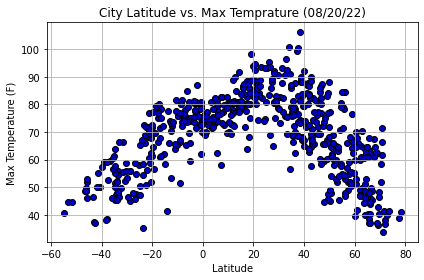

In [12]:
#Setting axis
x_Lat = city_data["Lat"]
y_Temp = city_data["Max Temp"]

#Plotting ScatterPlot and setting labels
fig1, ax1 = plt.subplots()
ax1.scatter(x_Lat,y_Temp,c='mediumblue',edgecolors='k')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Max Temperature (F)')
ax1.set_title('City Latitude vs. Max Temprature (08/20/22)')
ax1.grid(True)
fig1.tight_layout()

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig1.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()



## Latitude vs. Humidity Plot

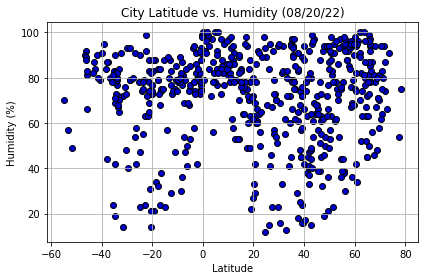

In [13]:
#Setting axis
x_Lat = city_data["Lat"]
y_Hum = city_data["Humidity"]

#Plotting ScatterPlot and setting labels
fig2, ax2 = plt.subplots()
ax2.scatter(x_Lat,y_Hum,c='mediumblue',edgecolors='k')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('City Latitude vs. Humidity (08/20/22)')
ax2.grid(True)
fig2.tight_layout()

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig2.png',dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

## Latitude vs. Cloudiness Plot

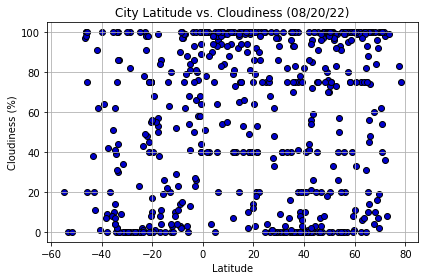

In [14]:
#Setting axis
x_Lat = city_data["Lat"]
y_Cld = city_data["Cloudiness"]

#Plotting ScatterPlot and setting labels
fig3, ax3 = plt.subplots()
ax3.scatter(x_Lat,y_Cld,c='mediumblue',edgecolors='k')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness (%)')
ax3.set_title('City Latitude vs. Cloudiness (08/20/22)')
ax3.grid(True)
fig3.tight_layout()

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig3.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

## Latitude vs. Wind Speed Plot

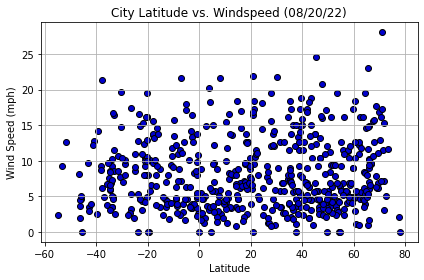

In [15]:
#Setting axis
x_Lat = city_data["Lat"]
y_Ws = city_data["Wind Speed"]

#Plotting ScatterPlot and setting labels
fig4, ax4 = plt.subplots()
ax4.scatter(x_Lat,y_Ws,c='mediumblue',edgecolors='k')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Latitude vs. Windspeed (08/20/22)')
ax4.grid(True)
fig4.tight_layout()

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig4.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

## Linear Regression

In [16]:
#Separating Northern and Southern Hemisphere data from city_data data frame 
#and saving in separate dataframes to use for plots below:

Northern_hem_df = city_data.loc[city_data["Lat"] > 0]
Southern_hem_df = city_data.loc[city_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.65
linear regression model : y = -0.47x + 89.49


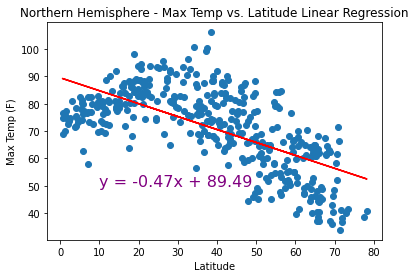

In [18]:
#Setting axis
x_Lat = Northern_hem_df['Lat']
y_Temp = Northern_hem_df['Max Temp']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Temp)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Temp)
plt.scatter(x_Lat,y_Temp)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(10,50), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig5.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.79
linear regression model : y = 0.71x + 78.37


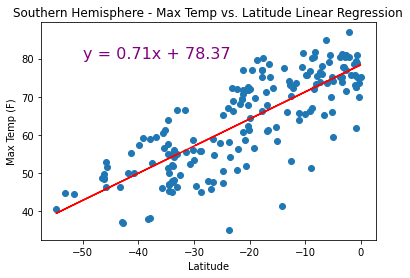

In [20]:
#Setting axis
x_Lat = Southern_hem_df['Lat']
y_Temp = Southern_hem_df['Max Temp']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Temp)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Temp)
plt.scatter(x_Lat,y_Temp)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(-50,80), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig6.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.07
linear regression model : y = -0.07x + 74.59


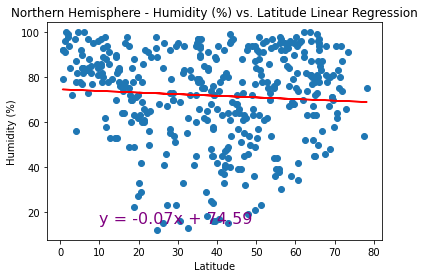

In [21]:
#Setting axis
x_Lat = Northern_hem_df['Lat']
y_Hum = Northern_hem_df['Humidity']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Hum)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Hum)
plt.scatter(x_Lat,y_Hum)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(10,15), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")


#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig7.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.03
linear regression model : y = 0.05x + 72.59


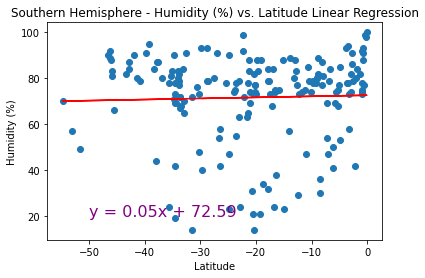

In [22]:
#Setting axis
x_Lat = Southern_hem_df['Lat']
y_Hum = Southern_hem_df['Humidity']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Hum)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Hum)
plt.scatter(x_Lat,y_Hum)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(-50,20), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")


#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig8.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.06
linear regression model : y = -0.11x + 65.53


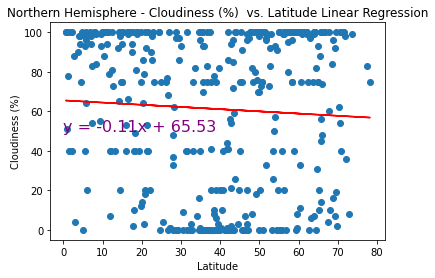

In [23]:
#Setting axis
x_Lat = Northern_hem_df['Lat']
y_Cld = Northern_hem_df['Cloudiness']


#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Cld)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Cld)
plt.scatter(x_Lat,y_Cld)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(0,50), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression")


#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig9.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2
linear regression model : y = 0.56x + 56.33


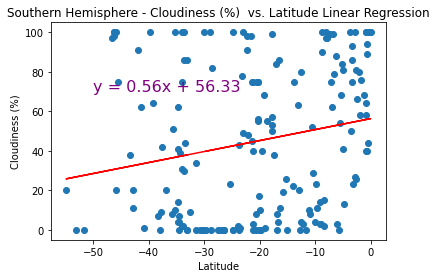

In [24]:
#Setting axis
x_Lat = Southern_hem_df['Lat']
y_Cld = Southern_hem_df['Cloudiness']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Cld)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Cld)
plt.scatter(x_Lat,y_Cld)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(-50,70), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression")

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig10.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.09
linear regression model : y = 0.023x + 7.23


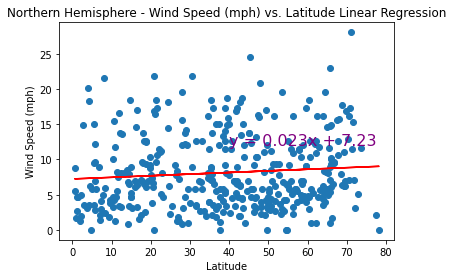

In [25]:
#Setting axis
x_Lat = Northern_hem_df['Lat']
y_Ws = Northern_hem_df['Wind Speed']


#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Ws)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Ws)
plt.scatter(x_Lat,y_Ws)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(40,12), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig11.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.01
linear regression model : y = 0.002x + 8.05


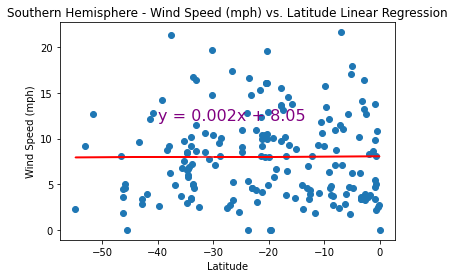

In [26]:
#Setting axis
x_Lat = Southern_hem_df['Lat']
y_Ws = Southern_hem_df['Wind Speed']

#Correlation coefficent
correlation = st.pearsonr(x_Lat,y_Ws)
print(f'The r-value is {round(correlation[0],2)}' )

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Lat,y_Ws)
plt.scatter(x_Lat,y_Ws)
regress_values =  x_Lat * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
print(f'linear regression model : {line_eq}')

#Plotting Linear regression model on the Scatter Plot
plt.plot(x_Lat,regress_values,"r-")
plt.annotate(line_eq,(-40,12), fontsize=16, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#Saving figure as png and showing output below
plt.savefig('WeatherPy_Output\Fig12.png', dpi=300, bbox_inches='tight',facecolor = "w",edgecolor="w")
plt.show()

# Data Analysis

Observation Number 1: 
Looking at Fig 1:City Latitude vs. Max Temprature, we can notice the trend that Max Temprature of cities located at latitude of 0 to 40 are higher. This means that cities located near and above the equator till the latitude of 40 experience high tempratures, as we move to cities located further north of the equator (above latitude of 40) max tempratures start falling meaning these cities are comparitively colder and experience low tempratures over all. Same for cities located below the equator as we move to see cities further away from the equator max tempratures decrease as we move towards the poles. And the north and south poles experience the lowest tempratures.

The reason this trend happens is due to the nature of earth being round. The suns warmth hits the  the Earth most directly at the Equator. The curve of the Earth means that sunlight is spread over a wider area the further you move from the Equator. Sunlight hits a smaller surface area at the Equator so heats up quickly compared to the poles.

Observation Number 2:
Looking at rest of the scatter plots ie City Latitude vs. Windspeed, City Latitude vs. Humidity and City Latitude vs. Cloudiness we can say that there is no observable fixed trend or pattern. Meaning that Windspeed, Humidity and Cloudiness a city expierences is not dependant on the latitude and location of the city.

We can explain this by thinking that wind, humidity and cloudiness is determined within the atmosphere not the intensity of sun or sunlight. Latidude location basically determines the amount and intensity of sun a city faces.

Observation Number 3:
For the Northern Hempisphere the latitude and max tempratures are negatively correlated, with a strong but correlation coefficent. This explains that as we move further from the equator towards the north pole max tempratures fall as spread of sun's energy gets spread over a wider area

For the Southern Hempisphere the latidude and max tempratures are positively correlated with a strong correlation coeffient. This explains that as we move from South pole towards the equator the max tempratures start increasing. with the max tempratures being highest around the equator as there is lesser distance between the sun and equator compared the distance from sun and South pole